<a href="https://colab.research.google.com/github/AbdurRahmaneee/machine_learning_projects/blob/main/Multiphaseflow_final_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Extacting data 
import numpy as np
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Multiphase_project/dataset_2.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("dataset_2"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'dataset_2'.
There are 5 directories and 0 images in 'dataset_2/train'.
There are 0 directories and 6 images in 'dataset_2/train/slug'.
There are 0 directories and 7 images in 'dataset_2/train/wavy'.
There are 0 directories and 7 images in 'dataset_2/train/stratified'.
There are 0 directories and 7 images in 'dataset_2/train/annular'.
There are 0 directories and 5 images in 'dataset_2/train/plug'.
There are 5 directories and 0 images in 'dataset_2/test'.
There are 0 directories and 2 images in 'dataset_2/test/slug'.
There are 0 directories and 11 images in 'dataset_2/test/wavy'.
There are 0 directories and 9 images in 'dataset_2/test/stratified'.
There are 0 directories and 7 images in 'dataset_2/test/annular'.
There are 0 directories and 1 images in 'dataset_2/test/plug'.


In [ ]:
# Create training and test directory paths
train_dir_2 = "dataset_2/train"
test_dir_2 = "dataset_2/test"

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_4 = tf.keras.utils.image_dataset_from_directory(train_dir_2,
                                                         label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                         batch_size=2)
test_data_4 = tf.keras.utils.image_dataset_from_directory(test_dir_2,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        shuffle=False,
                                                        batch_size=2)

Found 32 files belonging to 5 classes.
Found 30 files belonging to 5 classes.


In [ ]:
class_names = test_data_4.class_names
class_names

NameError: ignored

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5)

In [ ]:
# Creating data augmentation layer
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    #preprocessing.RandomCrop(244, 244, 42),
    #preprocessing.RandomHeight(0.2), 
    #preprocessing.RandomWidth(0.2), 
    preprocessing.RandomZoom(0.2),
    # preprocessing.Rescalling(1/255.)
    preprocessing.RandomContrast(0.2)
    #preprocessing.RandomTranslation(height_factor=(-0.1, +0.1), width_factor=(-0.1, +0.1), fill_mode="nearest", interpolation="nearest", seed= 42)
], name ="data_augmentation")

In [ ]:
# Function to plot loss cureves
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.

  Args:
    history: Tensorflow History object.
  
  Returns:
    Plot of training/validation loss and accuracy metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

In [ ]:
# Create a confusion metrics

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):


  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)


  # Set labels to be claseses
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Let's try EfficientNetB2
# Setup the base model
base_model_22 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_22.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_22(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_22 = tf.keras.Model(inputs, outputs)

# Compile
model_22.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_22 = model_22.fit(train_data_4,
                               epochs=100,
                               validation_data=test_data_4,
                               validation_steps=len(test_data_4),
                               callbacks=[early_stopping])

31790344/31790344 [==============================] - 0s 0us/step
Epoch 1/100


16/16 [==============================] - 23s 686ms/step - loss: 1.7490 - accuracy: 0.1562 - val_loss: 1.5275 - val_accuracy: 0.4000
Epoch 2/100
16/16 [==============================] - 9s 525ms/step - loss: 1.3738 - accuracy: 0.4375 - val_loss: 1.4222 - val_accuracy: 0.4000
Epoch 3/100
16/16 [==============================] - 9s 525ms/step - loss: 1.3347 - accuracy: 0.4375 - val_loss: 1.2395 - val_accuracy: 0.5667
Epoch 4/100
16/16 [==============================] - 10s 551ms/step - loss: 1.2862 - accuracy: 0.4375 - val_loss: 1.1942 - val_accuracy: 0.6000
Epoch 5/100
16/16 [==============================] - 9s 530ms/step - loss: 1.1628 - accuracy: 0.5312 - val_loss: 1.0753 - val_accuracy: 0.6333
Epoch 6/100
16/16 [==============================] - 9s 525ms/step - loss: 1.0914 - accuracy: 0.6250 - val_loss: 1.0312 - val_accuracy: 0.6333
Epoch 7/100
16/16 [==============================] - 9s 536ms/step - loss: 1.0361 - accuracy: 0.5938 - val_loss: 0.9950 - val_accuracy: 0.6000
Epoch 8/1

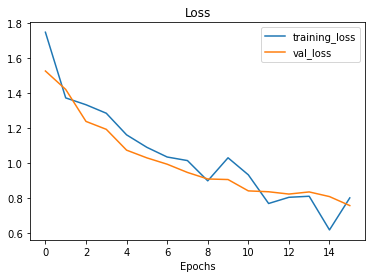

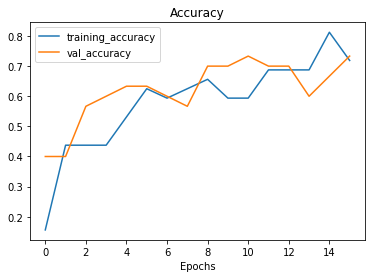

In [ ]:
plot_loss_curves(history_model_22)

In [ ]:
# Making predictions with our best model so far
y_probs = model_22.predict(test_data_4)

# View the first predcitons
y_probs[:5]

15/15 [==============================] - 7s 319ms/step


array([[0.5694955 , 0.01789652, 0.31508687, 0.00964531, 0.08787578],
       [0.45783526, 0.03516887, 0.35754365, 0.01461287, 0.13483928],
       [0.80612516, 0.01144501, 0.06135682, 0.01673779, 0.10433517],
       [0.5949654 , 0.04122897, 0.07519825, 0.029106  , 0.25950143],
       [0.61195564, 0.02487846, 0.14652099, 0.0336047 , 0.18304017]],
      dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds

array([0, 0, 0, 0, 0, 4, 0, 1, 2, 2, 4, 3, 3, 1, 3, 4, 3, 3, 3, 0, 4, 4,
       0, 0, 4, 0, 4, 4, 4, 4])

In [ ]:
# unbatching test data batch to get y_labels
y_labels = []
for images, labels in test_data_4.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 2, 2]

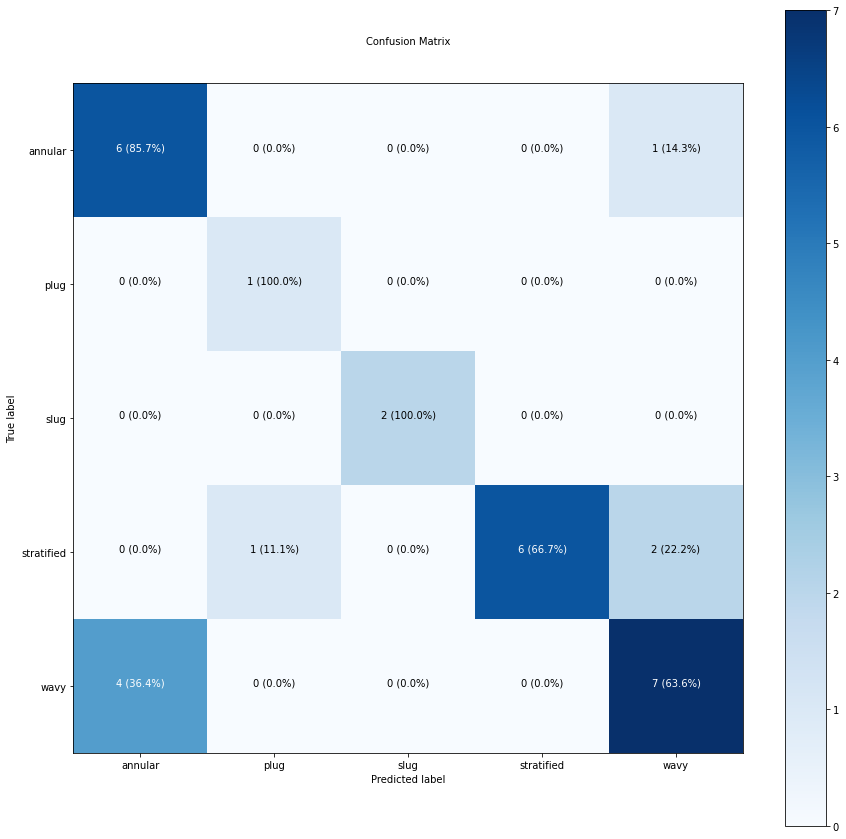

In [ ]:
# make a good confusion matrix
make_confusion_matrix(y_true=y_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
# Saving model to Goodgle Drive
save_dir = "/content/drive/MyDrive/Multiphase_project/"
model_22.save(save_dir)

In [ ]:
# Load model
loaded_model = tf.keras.models.load_model(save_dir)

In [ ]:
loaded_model.evaluate(test_data_4)

15/15 [==============================] - 9s 274ms/step - loss: 0.7587 - accuracy: 0.7333


[0.7587215900421143, 0.7333333492279053]

In [ ]:
# Making predictions with our best model so far
y_probs_loaded = loaded_model.predict(test_data_4)

# View the first predcitons
y_probs_loaded[:5]

15/15 [==============================] - 2s 105ms/step


array([[0.56949615, 0.01789654, 0.315086  , 0.00964533, 0.08787595],
       [0.45783532, 0.03516887, 0.35754383, 0.0146129 , 0.13483909],
       [0.8061248 , 0.01144502, 0.06135678, 0.01673784, 0.10433556],
       [0.5949647 , 0.0412291 , 0.07519838, 0.02910601, 0.25950187],
       [0.61195606, 0.02487844, 0.14652121, 0.03360454, 0.18303978]],
      dtype=float32)

In [ ]:
y_preds_loaded = y_probs_loaded.argmax(axis=1)
y_preds_loaded

array([0, 0, 0, 0, 0, 4, 0, 1, 2, 2, 4, 3, 3, 1, 3, 4, 3, 3, 3, 0, 4, 4,
       0, 0, 4, 0, 4, 4, 4, 4])

In [ ]:
# Get all of the image file paths in the test dataset
filepaths = []
for filepath in test_data_4.list_files("/content/dataset_2/test/*/*.png",
                                      shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]


[b'/content/dataset_2/test/annular/17.png',
 b'/content/dataset_2/test/annular/20.png',
 b'/content/dataset_2/test/annular/21.png',
 b'/content/dataset_2/test/annular/22.png',
 b'/content/dataset_2/test/annular/51.png',
 b'/content/dataset_2/test/annular/56.png',
 b'/content/dataset_2/test/annular/7.png',
 b'/content/dataset_2/test/plug/29b.png',
 b'/content/dataset_2/test/slug/14.png',
 b'/content/dataset_2/test/slug/15.png']

In [ ]:
#Create a DataFrame of different parameters for each of the test images
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": y_preds_loaded,
                        "pred_conf": y_probs_loaded.max(axis=1),
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in y_preds_loaded]})
pred_df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'/content/dataset_2/test/annular/17.png',0,0,0.569496,annular,annular
1,b'/content/dataset_2/test/annular/20.png',0,0,0.457835,annular,annular
2,b'/content/dataset_2/test/annular/21.png',0,0,0.806125,annular,annular
3,b'/content/dataset_2/test/annular/22.png',0,0,0.594965,annular,annular
4,b'/content/dataset_2/test/annular/51.png',0,0,0.611956,annular,annular
5,b'/content/dataset_2/test/annular/56.png',0,4,0.440638,annular,wavy
6,b'/content/dataset_2/test/annular/7.png',0,0,0.562234,annular,annular
7,b'/content/dataset_2/test/plug/29b.png',1,1,0.715026,plug,plug
8,b'/content/dataset_2/test/slug/14.png',2,2,0.552420,slug,slug
9,b'/content/dataset_2/test/slug/15.png',2,2,0.359319,slug,slug


In [ ]:
#Find out in our DataFrame which predictions are wrong
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'/content/dataset_2/test/annular/17.png',0,0,0.569496,annular,annular,True
1,b'/content/dataset_2/test/annular/20.png',0,0,0.457835,annular,annular,True
2,b'/content/dataset_2/test/annular/21.png',0,0,0.806125,annular,annular,True
3,b'/content/dataset_2/test/annular/22.png',0,0,0.594965,annular,annular,True
4,b'/content/dataset_2/test/annular/51.png',0,0,0.611956,annular,annular,True
5,b'/content/dataset_2/test/annular/56.png',0,4,0.440638,annular,wavy,False
6,b'/content/dataset_2/test/annular/7.png',0,0,0.562234,annular,annular,True
7,b'/content/dataset_2/test/plug/29b.png',1,1,0.715026,plug,plug,True
8,b'/content/dataset_2/test/slug/14.png',2,2,0.552420,slug,slug,True
9,b'/content/dataset_2/test/slug/15.png',2,2,0.359319,slug,slug,True


In [ ]:
# Saving file
pred_df.to_excel("pred_df.xlsx", index=False)

# split image work

In [ ]:
# Extacting data 
import numpy as np
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Multiphase_project/split_images_dataset_3_train_test.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("split_images_dataset_3_train_test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'split_images_dataset_3_train_test'.
There are 5 directories and 0 images in 'split_images_dataset_3_train_test/test'.
There are 0 directories and 5 images in 'split_images_dataset_3_train_test/test/plug'.
There are 0 directories and 7 images in 'split_images_dataset_3_train_test/test/slug'.
There are 0 directories and 15 images in 'split_images_dataset_3_train_test/test/wavy'.
There are 0 directories and 14 images in 'split_images_dataset_3_train_test/test/stratified'.
There are 0 directories and 12 images in 'split_images_dataset_3_train_test/test/annular'.
There are 5 directories and 0 images in 'split_images_dataset_3_train_test/train'.
There are 0 directories and 19 images in 'split_images_dataset_3_train_test/train/plug'.
There are 0 directories and 25 images in 'split_images_dataset_3_train_test/train/slug'.
There are 0 directories and 57 images in 'split_images_dataset_3_train_test/train/wavy'.
There are 0 directories and 54 images in 'sp

In [ ]:
# Create training and test directory paths
train_dir_3 = "split_images_dataset_3_train_test/train"
test_dir_3 = "split_images_dataset_3_train_test/test"

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_5 = tf.keras.utils.image_dataset_from_directory(train_dir_3,
                                                         label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                         batch_size=2)
test_data_5 = tf.keras.utils.image_dataset_from_directory(test_dir_3,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        shuffle=False,
                                                        batch_size=2)

Found 199 files belonging to 5 classes.
Found 53 files belonging to 5 classes.


In [ ]:
class_names = test_data_5.class_names
class_names

['annular', 'plug', 'slug', 'stratified', 'wavy']

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5)

In [ ]:
# Let's try EfficientNetB2
# Setup the base model
base_model_23 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_23.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_23(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_23 = tf.keras.Model(inputs, outputs)

# Compile
model_23.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_23 = model_23.fit(train_data_5,
                               epochs=100,
                               validation_data=test_data_5,
                               validation_steps=len(test_data_5),
                               callbacks=[early_stopping])

Epoch 1/100


100/100 [==============================] - 26s 95ms/step - loss: 1.5173 - accuracy: 0.3065 - val_loss: 1.2579 - val_accuracy: 0.5849
Epoch 2/100
100/100 [==============================] - 8s 72ms/step - loss: 1.2986 - accuracy: 0.4422 - val_loss: 1.1468 - val_accuracy: 0.5472
Epoch 3/100
100/100 [==============================] - 8s 75ms/step - loss: 1.2295 - accuracy: 0.4774 - val_loss: 1.0653 - val_accuracy: 0.5849
Epoch 4/100
100/100 [==============================] - 8s 75ms/step - loss: 1.1807 - accuracy: 0.5276 - val_loss: 1.0414 - val_accuracy: 0.6038
Epoch 5/100
100/100 [==============================] - 8s 75ms/step - loss: 1.0871 - accuracy: 0.5226 - val_loss: 1.0149 - val_accuracy: 0.5283
Epoch 6/100
100/100 [==============================] - 8s 73ms/step - loss: 1.0715 - accuracy: 0.5578 - val_loss: 1.0947 - val_accuracy: 0.4906
Epoch 7/100
100/100 [==============================] - 8s 73ms/step - loss: 1.0029 - accuracy: 0.5930 - val_loss: 1.0785 - val_accuracy: 0.4906
Epo